## Validation of Cooling Lib
This notebook will build the multi-layer structure described in Raman $et$ $al.$, Nature 515, 540-546 (2014), compute plot its emissivity in the solar region and in the atmospheric transmissivity region of the spectrum (~300-2500 nm for the former, 2500-20000 nm for the latter), and compute the cooling power for several different differences between the temperature of the structure and the ambient temperature.  


 Temperature not specified!
 Proceeding with default T = 300 K


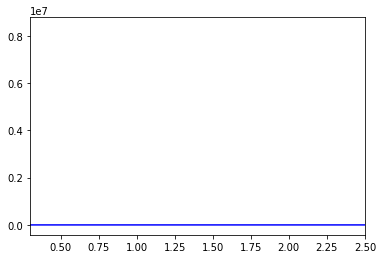

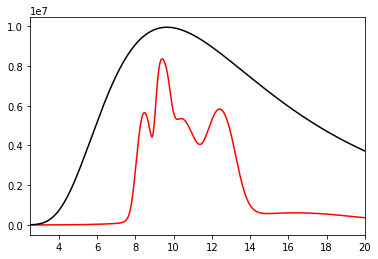

In [4]:
### Import WPTHERML class!
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib

### Define structure!

structure = {

        'Material_List': ['Air', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'Ag', 'Air'],
        'Thickness_List': [0, 230e-9, 485e-9, 688e-9, 13e-9, 73e-9, 34e-9, 54e-9, 200e-9, 0],
        'Lambda_List': [300e-9, 20000e-9, 2000],
        'EXPLICIT_ANGLE': 1,
        'COOLING': 1
     
        }

### create instance of multilayer class - results will be computed automiatically
w_slab = multilayer(structure)
AM = datalib.AM(w_slab.lambda_array)
T_atm = datalib.ATData(w_slab.lambda_array)
BB = datalib.BB(w_slab.lambda_array, w_slab.T_ml)

### plot results!
plt.plot(w_slab.lambda_array*1e6, w_slab.thermal_emission_array, 'blue')
#plt.plot(w_slab.lambda_array*1e6, AM/(1.4*1e9), 'red')
plt.xlim(0.3,2.5)
plt.show()


#plt.plot(w_slab.lambda_array*1e6, T_atm, 'cyan', label='Atmospheric Transparency')
plt.plot(w_slab.lambda_array*1e6, w_slab.thermal_emission_array, 'red', label='Emissivity')
plt.plot(w_slab.lambda_array*1e6, BB, 'black')
plt.xlim(2.5,20)
plt.show()


In [7]:
#w_slab.cooling_power()

print("Radiative Power (cooling) is ",w_slab.radiative_power_val, "W/m^2")
print("Absorbed Solar Power (warming) is ",w_slab.solar_power_val, "W/m^2")
print("Absorbed Atmospheric Radiation (warming) is ",w_slab.atmospheric_power_val, "W/m^2")
print("Net Power flux out of the structure is ",w_slab.cooling_power_val, "W/m^2")

Radiative Power (cooling) is  112.07959879454343 W/m^2
Absorbed Solar Power (warming) is  18.602633707369037 W/m^2
Absorbed Atmospheric Radiation (warming) is  29.679241649356346 W/m^2
Net Power flux out of the structure is  63.79772343781805 W/m^2
